#                      TWITTER SENTIMENT ANALYSIS

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train= pd.read_csv('train_E6oV3lV (3).csv')
test= pd.read_csv('test_tweets_anuFYb8.csv')
data= train.append(test, ignore_index=True,sort='True')

In [3]:
data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [4]:
def remove_pattern(input_txt, pattern):
    reg= re.compile(pattern)
    r=reg.findall(input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [5]:
# remove twitter handles (@user)
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")

In [6]:
 # remove special characters, numbers, punctuations
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

#### removing all words like ohh,hmm whose length is less than or equal to 3 because they are not of much use. 


In [7]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [8]:
data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


### we can see the difference between tweets and tidy tweets,only the important words are retained and all the noise(special words,numbers,punctuation) has been removed.

## Tokenization
#### all the tweets are strings and we have to find important words to model the data.so we will use the process of tokenization to split the string wherever we find blank space and thus we have a set of words.

In [9]:
data['tidy_tweet']=data['tidy_tweet'].apply(lambda x:x.split())

### Stopwords
####  A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [10]:
from nltk.corpus import stopwords

In [11]:
stop=set(stopwords.words('english'))
data['tidy_tweet']=data['tidy_tweet'].apply(lambda x:[i for i in x if i not in stop])

In [12]:
data['tidy_tweet'].head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

### Lammetization
#### Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. For example, the verb ‘to walk’ may appear as ‘walk’, ‘walked’, ‘walks’, ‘walking’. 

In [13]:
from nltk.stem import WordNetLemmatizer

In [14]:
lemmatizer=WordNetLemmatizer()

In [15]:
data['tidy_tweet']=data['tidy_tweet'].apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

In [16]:
data['tidy_tweet']=data['tidy_tweet'].apply(lambda x:' '.join(x))

In [17]:
data['tidy_tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks #lyft credit cause offer wheelchair van...
2                                       bihday majesty
3                                #model love take time
4                       factsguide society #motivation
Name: tidy_tweet, dtype: object

## EDA

### we will explore the cleaned tweets. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights. 

## A) Understanding the common words used in the tweets

In [18]:
from wordcloud import WordCloud

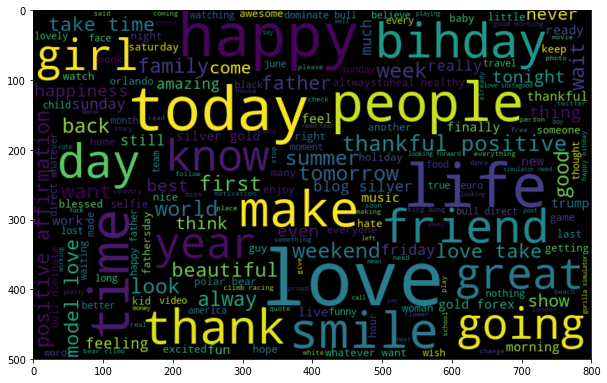

In [19]:
all_words = ' '.join([text for text in data['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")


### We can see most of the words are positive or neutral. With happy and love being the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes(racist/sexist or not) in our data.

## B) Words in non racist/sexist tweets

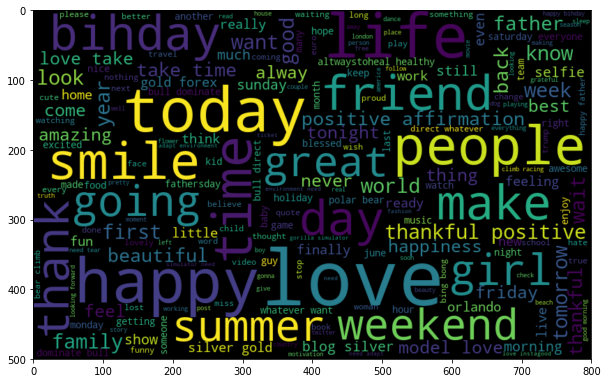

In [20]:
normal_words =' '.join([text for text in data['tidy_tweet'][data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

### We can see most of the words are positive or neutral. With happy, smile, and love being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is non racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

## C) Racist/Sexist Tweets

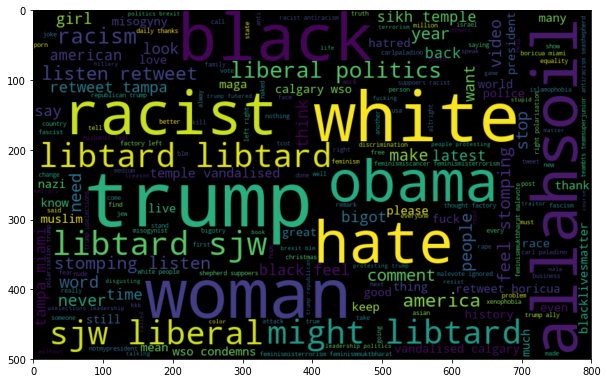

In [21]:
negative_words = ' '.join([text for text in data['tidy_tweet'][data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

### As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.


## D) Understanding the impact of Hashtags on tweets sentiment

### Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments. 

### We will store all the hashtag terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(data['tidy_tweet'][data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['tidy_tweet'][data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

### Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

[Text(0,0.5,'Count')]

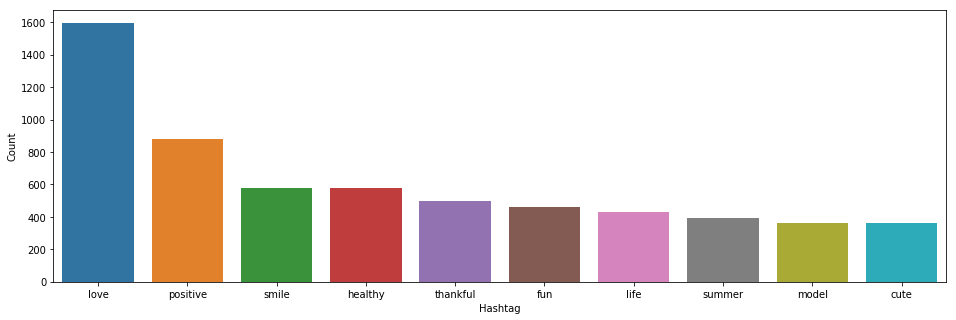

In [24]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')

### Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

[Text(0,0.5,'Count')]

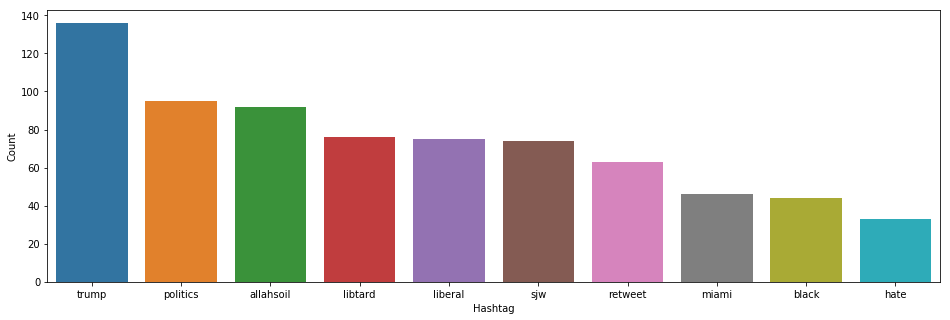

In [25]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')

### As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information.

## Modelling

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=data['tidy_tweet'][:len(train),]
y=data['label'][:len(train),]

In [28]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

### CountVectorizer does text preprocessing, tokenizing and filtering of stopwords and it builds a dictionary of features and transform documents to feature vectors.
### TfidfTransformer transforms the above vector by dividing the number of occurrences of each word in a document by the total number of words in the document. These new features are called tf for Term Frequencies.
### Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

In [30]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

## for transforming the 80% of the train data ##

X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = transformer.fit_transform(X_train_counts)

## for transforming the 20% of the train data which is being used for testing ##

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = transformer.transform(X_test_counts)

## Cross validation

### This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k-1 folds. The accuracy score is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error,accuracy score on the test data is the average of these k accuracy scores.


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

In [32]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('RFC',RandomForestClassifier()))
models.append(('KNC',KNeighborsClassifier()))

#evaluating each model in turn
results=[]
names=[]
for name,model in models:
    kfold=cross_validation.KFold(n=len(X_train),n_folds=10,random_state=7)
    cv_results=cross_validation.cross_val_score(model,X_train_tfidf,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.946654 (0.003753)
RFC: 0.957996 (0.002971)
KNC: 0.940084 (0.003805)


In [33]:
LR=LogisticRegression()
LR.fit(X_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_test_pred=LR.predict(X_test_tfidf)

In [35]:
print(accuracy_score(y_test,y_test_pred))

0.9488503050211169


In [36]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
y_pred=model.predict(X_test_tfidf)

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9638667292351009


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
print(confusion_matrix(y_test_pred,y_test))

[[5932  309]
 [  18  134]]


In [41]:
print(classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97      5950
        1.0       0.88      0.30      0.45       443

avg / total       0.95      0.95      0.94      6393



In [42]:
test_data=data['tidy_tweet'][len(train):,]

In [43]:
test_data_counts = count_vect.transform(test_data)
test_data_tfidf = transformer.transform(test_data_counts)

In [44]:
test_data_prediction=LR.predict(test_data_tfidf)

In [45]:
test['label']=pd.Series(test_data_prediction)

In [46]:
test.head()

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0.0
1,31964,@user #white #supremacists want everyone to s...,0.0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0.0
3,31966,is the hp and the cursed child book up for res...,0.0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0.0
